<a href="https://colab.research.google.com/github/edgarreis/Imersao-python-excel-analise-de-dados/blob/main/Imers%C3%A3o_Python_Aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from prophet import Prophet

In [ ]:
# Baixar os Dados
dados = yf.download('CPLE6.SA', start = '2020-01-01', end='2023-12-31', progress=False)
dados = dados.reset_index() # incluir o indice e a data vira uma coluna
dados.head()

In [10]:
# Divisão em dados de treino e dados de Teste
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [11]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date','Close']].rename(columns={'Date':'ds','Close':'y'})

In [12]:
# Criar Treino do Modelo
# Instancia
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)

# Adiciona os Feriados do US
modelo.add_country_holidays(country_name='US')

# Treina Efetivamento o modelo
modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmper9bn6dn/6muw1i_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmper9bn6dn/srilz6vz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42928', 'data', 'file=/tmp/tmper9bn6dn/6muw1i_r.json', 'init=/tmp/tmper9bn6dn/srilz6vz.json', 'output', 'file=/tmp/tmper9bn6dn/prophet_modelmlyve3mu/prophet_model-20240420051401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:14:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:14:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
# Cria datas fururas para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150) # 150 dias uteis
previsao = modelo.predict(futuro)
#previsao = modelo.predict_trend(futuro)

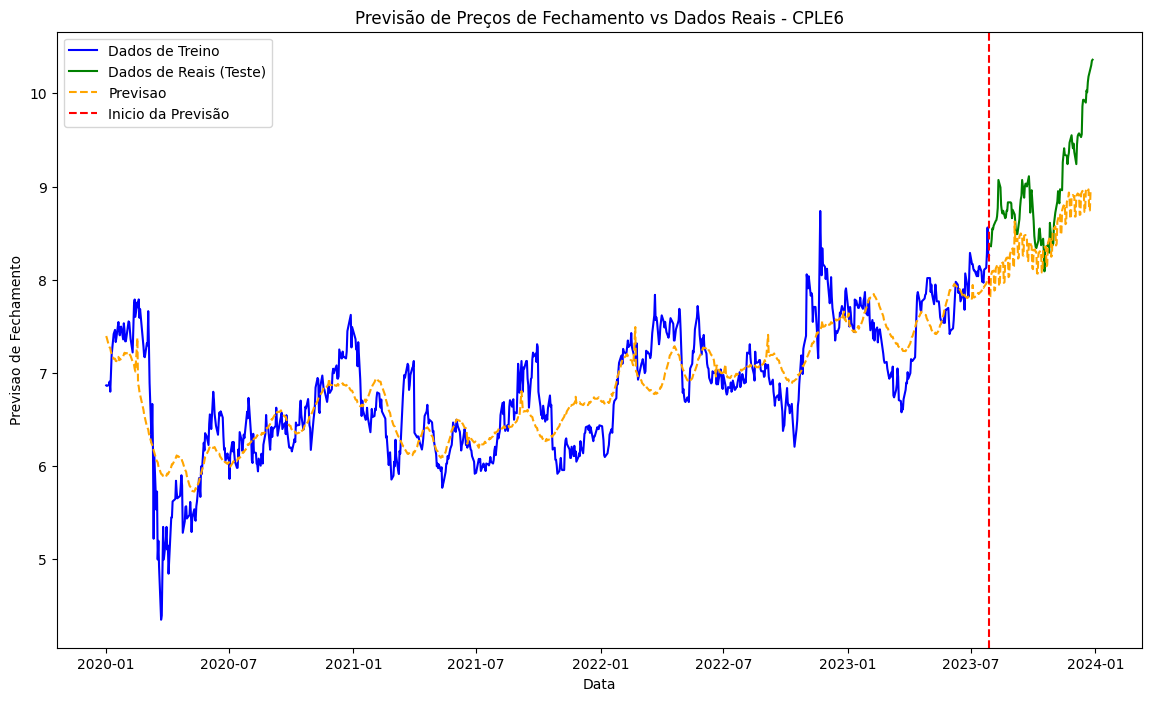

In [15]:
# Plotar o Grafico
plt.figure(figsize=(14,8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados de Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsao', color='orange', linestyle='--')


plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Inicio da Previsão')
plt.xlabel('Data')
plt.ylabel('Previsao de Fechamento')
plt.title('Previsão de Preços de Fechamento vs Dados Reais - CPLE6')
plt.legend()
plt.show()

In [8]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,15.436300,13.290062,17.391422,15.436300,15.436300,0.0,0.0,0.0,0.0,...,0.050506,0.050506,0.050506,-0.174844,-0.174844,-0.174844,0.0,0.0,0.0,15.311962
1,2020-01-03,15.487278,13.125515,17.313549,15.487278,15.487278,0.0,0.0,0.0,0.0,...,0.054347,0.054347,0.054347,-0.211048,-0.211048,-0.211048,0.0,0.0,0.0,15.330577
2,2020-01-06,15.640212,13.408270,17.439074,15.640212,15.640212,0.0,0.0,0.0,0.0,...,0.135697,0.135697,0.135697,-0.365345,-0.365345,-0.365345,0.0,0.0,0.0,15.410564
3,2020-01-07,15.691190,13.331750,17.330451,15.691190,15.691190,0.0,0.0,0.0,0.0,...,0.111561,0.111561,0.111561,-0.430287,-0.430287,-0.430287,0.0,0.0,0.0,15.372465
4,2020-01-08,15.742168,13.157636,17.256299,15.742168,15.742168,0.0,0.0,0.0,0.0,...,0.070674,0.070674,0.070674,-0.500532,-0.500532,-0.500532,0.0,0.0,0.0,15.312310
